**Review bag of words**

---



# **0. Import libraries**

In [86]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# **1. Load data**

In [87]:
# load data
output = pd.read_csv('/content/drive/MyDrive/1. Data Science/15. Sentiment analysis III/amazon_bikelight_reviews.csv')
output.tail()

,Stars,Review Text,Review Date,Review Helpful,Random
1995,5.0 out of 5 stars,"Easy to mount, compact and bright.","Reviewed in the United States on February 20, ...",No Data,1
1996,5.0 out of 5 stars,"Small, light, powerful and bright.","Reviewed in the United States on April 27, 2020",No Data,1
1997,5.0 out of 5 stars,Your browser does not support HTML5 video.\n ...,"Reviewed in the United States on September 24,...",No Data,1
1998,1.0 out of 5 stars,Mounts are waaay too short. Doesnt wrap around...,"Reviewed in the United States on October 25, 2021",No Data,1
1999,2.0 out of 5 stars,Initially was very excited about this light se...,"Reviewed in the United States on December 8, 2019",No Data,1


# **3. Preprocess**

In [88]:
# create a sample corpus and labels
corpus = output['Review Text']
#labels = output['Sentiment Label'] # there is no this column

In [89]:
# initialize CounterVectorize object
vectorizer = CountVectorizer()

In [90]:
# fit the vectorizer to the corpus (convert text into tokens) = tokenize
vectorizer.fit(corpus)

CountVectorizer()

In [91]:
# transform the corpus into a bag-of-words representation
bow_matrix = vectorizer.transform(corpus)

In [92]:
# show the matrix
print(bow_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **4. Hugging Face**

## **4.0. Import libraries**

In [98]:
from transformers import pipeline
import seaborn as sns

## **4.1. Load data**

In [99]:
# load dataset
data_import = pd.read_csv('/content/drive/MyDrive/1. Data Science/15. Sentiment analysis III/amazon_bikelight_reviews.csv')
data_import.tail()

,Stars,Review Text,Review Date,Review Helpful,Random
1995,5.0 out of 5 stars,"Easy to mount, compact and bright.","Reviewed in the United States on February 20, ...",No Data,1
1996,5.0 out of 5 stars,"Small, light, powerful and bright.","Reviewed in the United States on April 27, 2020",No Data,1
1997,5.0 out of 5 stars,Your browser does not support HTML5 video.\n ...,"Reviewed in the United States on September 24,...",No Data,1
1998,1.0 out of 5 stars,Mounts are waaay too short. Doesnt wrap around...,"Reviewed in the United States on October 25, 2021",No Data,1
1999,2.0 out of 5 stars,Initially was very excited about this light se...,"Reviewed in the United States on December 8, 2019",No Data,1


## **4.2. Run sentiment analysis**

In [100]:
# initialize the object
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [101]:
# try
classifier('It was sunny today.')

[{'label': 'POSITIVE', 'score': 0.9997982382774353}]

In [102]:
# run sentiment analysis
sentiment_label = []
sentiment_score = []
counter = 0

for i in data_import['Review Text']:
    i = i[:50]
    classification = classifier(i)[0]
    sentiment_label.append(classification.get('label'))
    sentiment_score.append(classification.get('score'))
    counter += 1

In [103]:
sentiment_label[:10]

['NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE']

In [104]:
# access a review
check_review = data_import.iloc[3, 1]
check_review

'*UPDATE*I was contacted by seller who offered a replacement light set. The new style bracket is much better. The rubber bracket is easier to attach and stretches to my new larger diameter handlebars. It seems like it will hold the light fine. I have only done a test ride and have not taken a long ride yet. Very pleased with the excellent customer service and new style bracket. THANKS!*ORIGINAL REVIEW*I had these on my old road bike for a couple of months and they worked pretty well. Bright and easy to recharge. I bought a new bike and wanted to move them but the bracket for the front light was too small for the new handlebars. The bracket is hard plastic not rubber like in the product picture. I was able to get it to stay with zip ties but during the ride the screw that holds the light to the bracket fell off and the light went flying off into the street . Goodbye light, not even going to stop and pick you up. I still have the rear light. It fits well on the stem but cannot be mounted

In [105]:
# create a sentiment dataframe
sentiment_data = pd.DataFrame(data={'Sentiment Label': sentiment_label, 'Sentiment Score': sentiment_score})
sentiment_data

,Sentiment Label,Sentiment Score
0,NEGATIVE,0.973588
1,NEGATIVE,0.999580
2,POSITIVE,0.576710
3,NEGATIVE,0.981318
4,POSITIVE,0.999335
...,...,...
1995,POSITIVE,0.999855
1996,POSITIVE,0.999882
1997,NEGATIVE,0.999580
1998,NEGATIVE,0.999592


In [112]:
# merge two dataframes
output = pd.concat([data_import, sentiment_data], axis=1)
output.tail(10)

,Stars,Review Text,Review Date,Review Helpful,Random,Sentiment Label,Sentiment Score
1990,5.0 out of 5 stars,"Pretty darn cool. Easy to install, very bright...","Reviewed in the United States on November 21, ...",No Data,1,POSITIVE,0.999776
1991,4.0 out of 5 stars,"Uh like it a lot. Bright, flashy, sexy.","Reviewed in the United States on September 26,...",No Data,1,POSITIVE,0.999878
1992,1.0 out of 5 stars,Light is bright but battery doesn’t hold a cha...,"Reviewed in the United States on March 19, 2021",One person found this helpful,1,NEGATIVE,0.999021
1993,5.0 out of 5 stars,"Bright and rechargeable, love 'em","Reviewed in the United States on March 2, 2021",No Data,1,POSITIVE,0.999885
1994,5.0 out of 5 stars,Really bright and awesome lights!,"Reviewed in the United States on February 8, 2021",No Data,1,POSITIVE,0.999886
1995,5.0 out of 5 stars,"Easy to mount, compact and bright.","Reviewed in the United States on February 20, ...",No Data,1,POSITIVE,0.999855
1996,5.0 out of 5 stars,"Small, light, powerful and bright.","Reviewed in the United States on April 27, 2020",No Data,1,POSITIVE,0.999882
1997,5.0 out of 5 stars,Your browser does not support HTML5 video.\n ...,"Reviewed in the United States on September 24,...",No Data,1,NEGATIVE,0.999580
1998,1.0 out of 5 stars,Mounts are waaay too short. Doesnt wrap around...,"Reviewed in the United States on October 25, 2021",No Data,1,NEGATIVE,0.999592
1999,2.0 out of 5 stars,Initially was very excited about this light se...,"Reviewed in the United States on December 8, 2019",No Data,1,POSITIVE,0.995951


<Axes: xlabel='Sentiment Label', ylabel='count'>

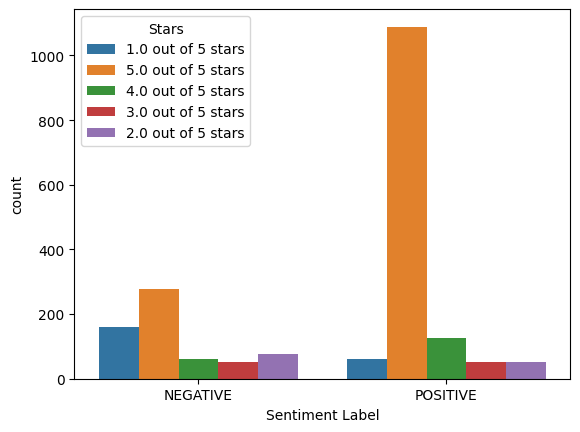

In [113]:
# plot the bar graph
sns.countplot(x='Sentiment Label', hue='Stars', data=output)

# **5. Exercise**

## **5.1. SVM**

In [124]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [115]:
# show output dataframe again
output.tail()

,Stars,Review Text,Review Date,Review Helpful,Random,Sentiment Label,Sentiment Score
1995,5.0 out of 5 stars,"Easy to mount, compact and bright.","Reviewed in the United States on February 20, ...",No Data,1,POSITIVE,0.999855
1996,5.0 out of 5 stars,"Small, light, powerful and bright.","Reviewed in the United States on April 27, 2020",No Data,1,POSITIVE,0.999882
1997,5.0 out of 5 stars,Your browser does not support HTML5 video.\n ...,"Reviewed in the United States on September 24,...",No Data,1,NEGATIVE,0.999580
1998,1.0 out of 5 stars,Mounts are waaay too short. Doesnt wrap around...,"Reviewed in the United States on October 25, 2021",No Data,1,NEGATIVE,0.999592
1999,2.0 out of 5 stars,Initially was very excited about this light se...,"Reviewed in the United States on December 8, 2019",No Data,1,POSITIVE,0.995951


In [117]:
# create a sample corpus of documents and labels
corpus = output['Review Text']
labels = output['Sentiment Label']

In [120]:
# initialize the CountVectorizer object
vectorizer = CountVectorizer()

In [122]:
# fit the model to the corpus
vectorizer.fit(corpus)

CountVectorizer()

In [123]:
# transform the corpus into a bag-of-words representation
bow_matrix = vectorizer.transform(corpus)

In [128]:
# show bag of words matrix
print(bow_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
# initialize svm classifer object
model_svm = svm.SVC(C=1, kernel='linear')

In [129]:
# train the classifier on the bag-of-words representation and labels
model_svm.fit(bow_matrix, labels)

SVC(C=1, kernel='linear')

In [133]:
# create a new corpus
new_corpus = [
    'This is a new negative.',
    'I love it.',
    'This is a new positive.'
]

In [134]:
# transform the new corpus into a bag-of-words representation
new_bow_matrix = vectorizer.transform(new_corpus)

In [135]:
# predict the labels for the new documents
predicted_labels = model_svm.predict(new_bow_matrix)
predicted_labels

array(['NEGATIVE', 'POSITIVE', 'NEGATIVE'], dtype=object)

*Right: 2/3*

---



## **5.2. Naive bayes**

In [140]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [136]:
# show dataframe gain
output.head()

,Stars,Review Text,Review Date,Review Helpful,Random,Sentiment Label,Sentiment Score
0,1.0 out of 5 stars,I had the rear light plugged in and charging a...,"Reviewed in the United States on February 24, ...",241 people found this helpful,1,NEGATIVE,0.973588
1,5.0 out of 5 stars,Your browser does not support HTML5 video.\n ...,"Reviewed in the United States on September 13,...",280 people found this helpful,1,NEGATIVE,0.999580
2,1.0 out of 5 stars,"The lights seem to be great, but the mounting ...","Reviewed in the United States on October 17, 2018",125 people found this helpful,1,POSITIVE,0.576710
3,4.0 out of 5 stars,*UPDATE*I was contacted by seller who offered ...,"Reviewed in the United States on March 10, 2019",81 people found this helpful,1,NEGATIVE,0.981318
4,3.0 out of 5 stars,"They are bright and easy to put on, but both l...","Reviewed in the United States on October 6, 2019",59 people found this helpful,1,POSITIVE,0.999335


In [137]:
# create a sample corpus and labels
corpus = output['Review Text']
labels = output['Sentiment Label']

In [143]:
# initialize models
vectorizer = CountVectorizer()
clf = GaussianNB()

In [144]:
#fit the vectorizer to the corpus
vectorizer.fit(corpus)

CountVectorizer()

In [146]:
# transform a corpus into a bag-of-words representation
bow_matrix = vectorizer.transform(corpus)
bow_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [148]:
# create a naive bayes classifier
clf.fit(bow_matrix.toarray(), labels)

GaussianNB()

In [147]:
# create a new corpus
new_corpus = [
    'This is a new negative.',
    'I love it.',
    'This is a new positive.'
]

In [ ]:
# tranform the new corpus into the bag-of-words representation
new_bow_matrix = vectorizer.transform(new_corpus)

In [150]:
# predict the labels for the new documents
predicted_labels = clf.predict(new_bow_matrix.toarray())
predicted_labels

array(['NEGATIVE', 'NEGATIVE', 'POSITIVE'], dtype='<U8')

*Right: 2/3*

---

